In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerce-customer-churn/E Commerce Dataset.xlsx


# E-Commerce Customer Churn Analysis and Prediction

# 1. Import Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report


In [3]:
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# 2. Reading and Cleaning Data

In [4]:
df=pd.read_excel('/kaggle/input/e-commerce-customer-churn/E Commerce Dataset.xlsx',sheet_name="E Comm")

In [5]:
df.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
4676,54677,0,1.0,Mobile Phone,1,11.0,Credit Card,Male,3.0,2,Mobile Phone,5,Married,4,0,17.0,1.0,2.0,3.0,153.19
241,50242,1,4.0,Computer,3,10.0,E wallet,Male,2.0,3,Laptop & Accessory,4,Single,2,0,18.0,7.0,7.0,7.0,193.55
1231,51232,0,14.0,Phone,3,14.0,E wallet,Female,2.0,3,Laptop & Accessory,4,Married,6,0,21.0,1.0,1.0,4.0,143.93
5130,55131,0,1.0,Mobile Phone,3,18.0,Credit Card,Female,4.0,2,Mobile Phone,1,Married,10,0,15.0,1.0,2.0,1.0,150.34
5249,55250,0,11.0,Mobile Phone,1,20.0,Credit Card,Male,3.0,4,Laptop & Accessory,1,Married,3,0,18.0,3.0,4.0,8.0,167.85


In [6]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [8]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [9]:
df.shape

(5630, 20)

In [10]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [11]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)
        

df.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [13]:
df.duplicated().sum()

0

In [14]:
df.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

# 3. Exploratory Data Analysis

####  Count and Percentage of Customer Churn

In [15]:
df.Churn.value_counts()

Churn
0    4682
1     948
Name: count, dtype: int64

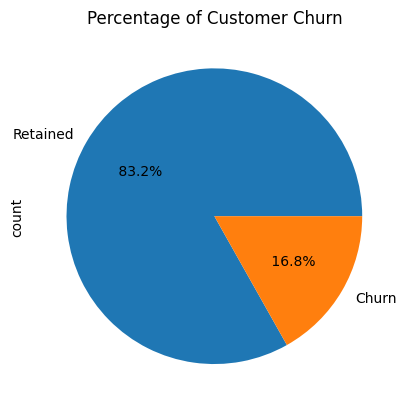

In [16]:
labels = ['Retained','Churn']
df.Churn.value_counts().plot.pie(autopct="% 0.1f%%",labels =labels)
plt.title('Percentage of Customer Churn')
plt.show()

#### Customer Churn based on Gender

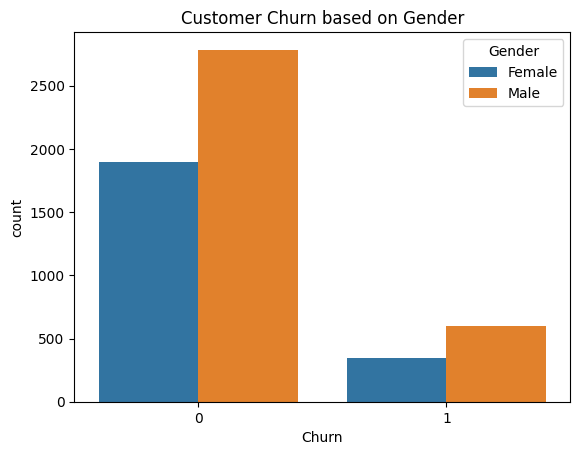

In [17]:
sns.countplot(x=df['Churn'],hue=df['Gender'])
plt.title('Customer Churn based on Gender')
plt.show()

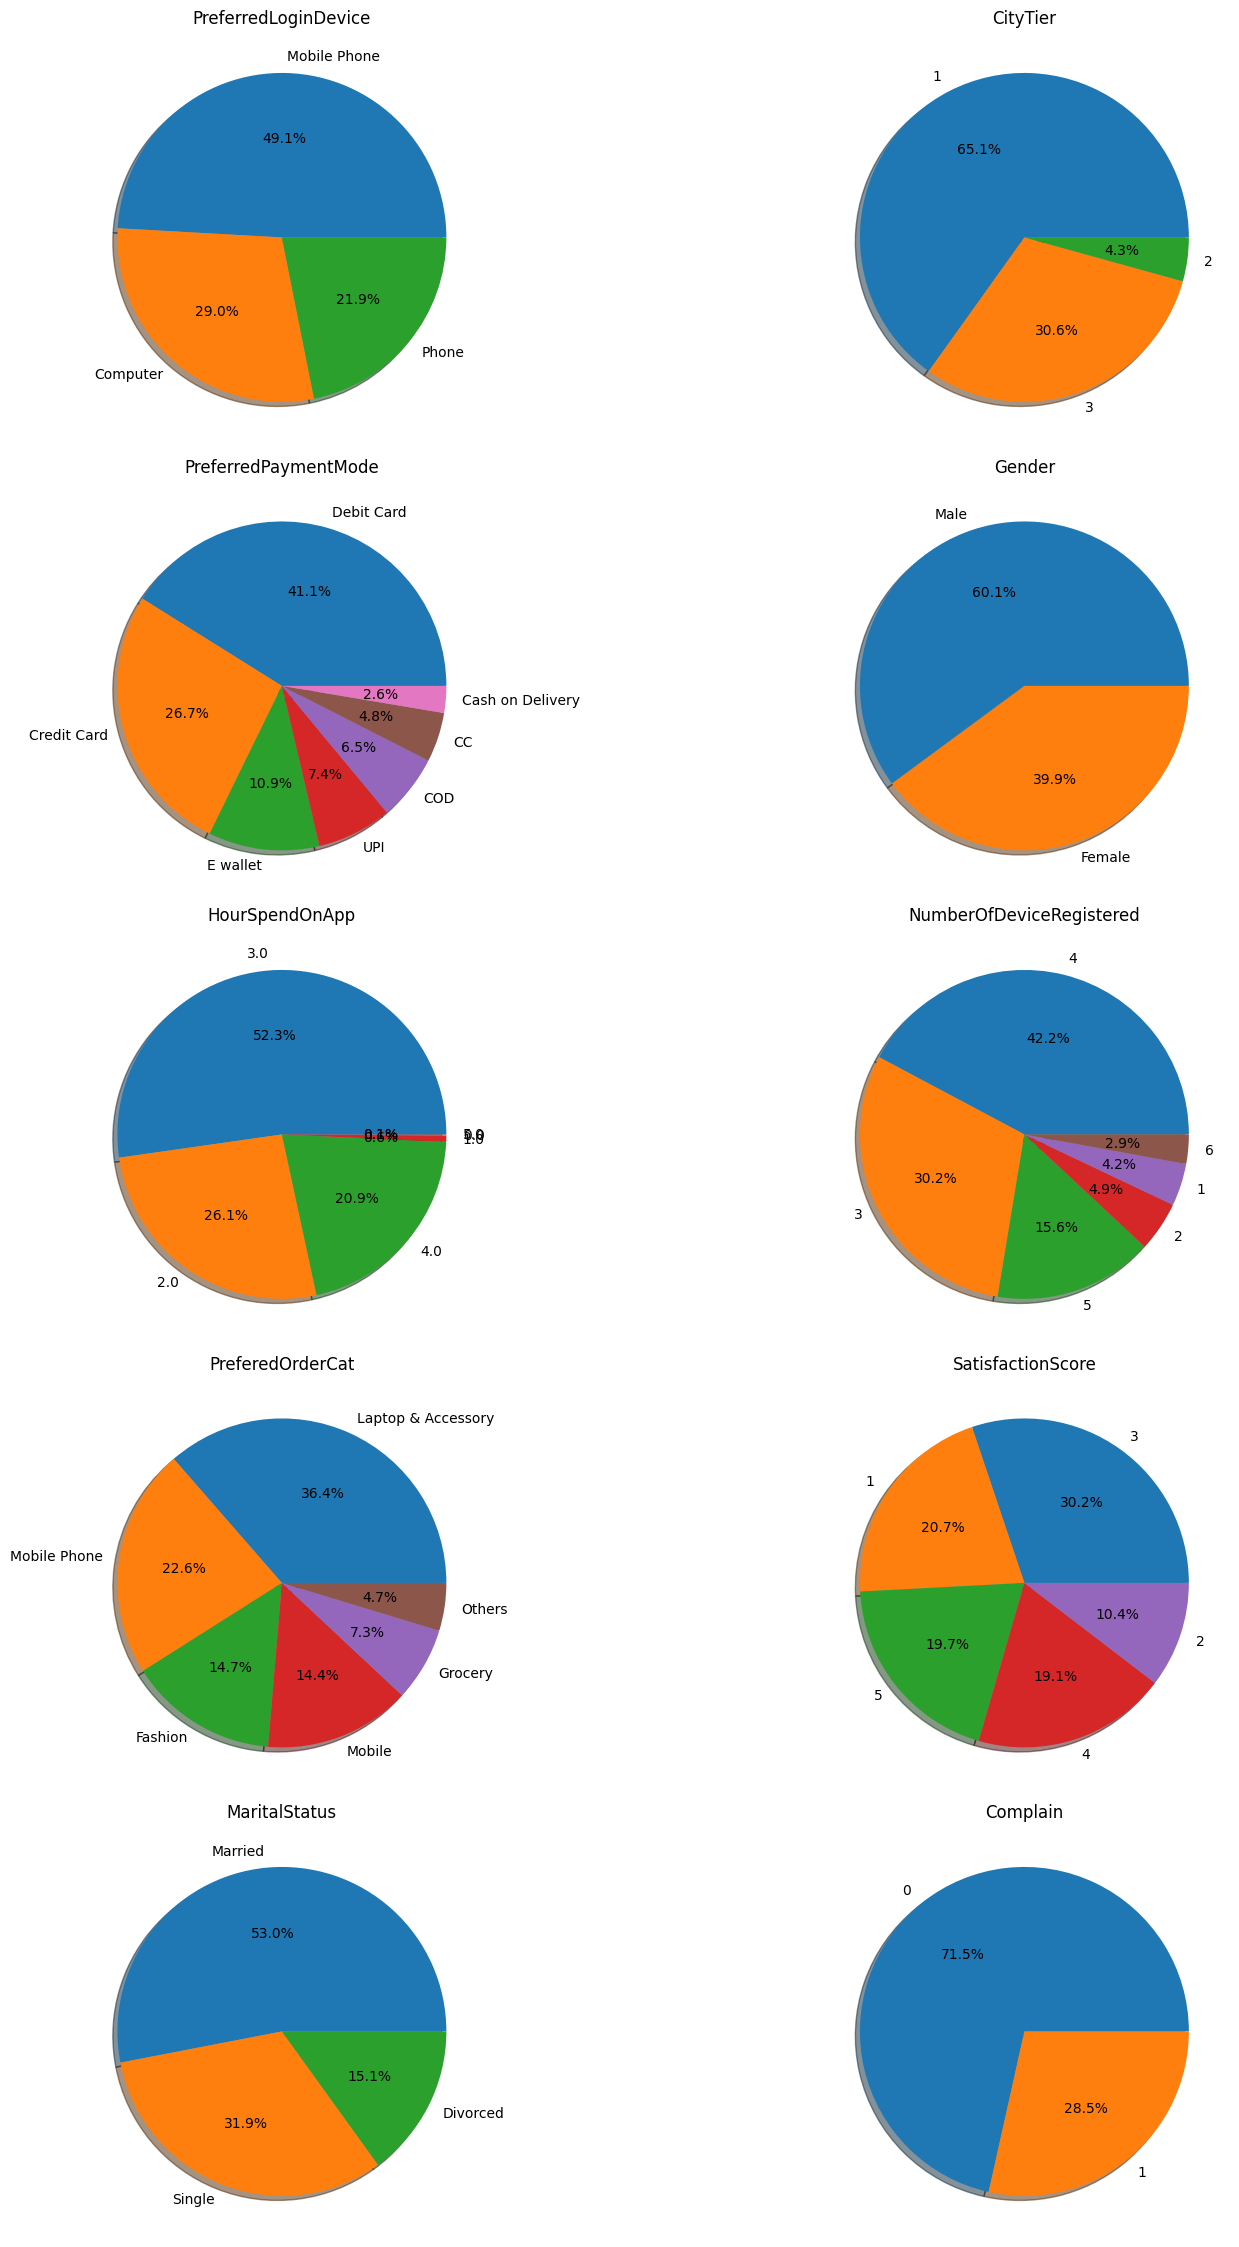

In [18]:
plt.figure(figsize=(15,45))
plot_num = 1
for col in df:
    if df[col].nunique() <= 7 and col != "Churn":
        plt.subplot(10,2,plot_num)
        plt.pie(data=df, x=df[col].value_counts().values,labels=df[col].value_counts().index,shadow=True,autopct='%1.1f%%') 
        plt.title(col)
        plot_num += 1
        plt.tight_layout()
    

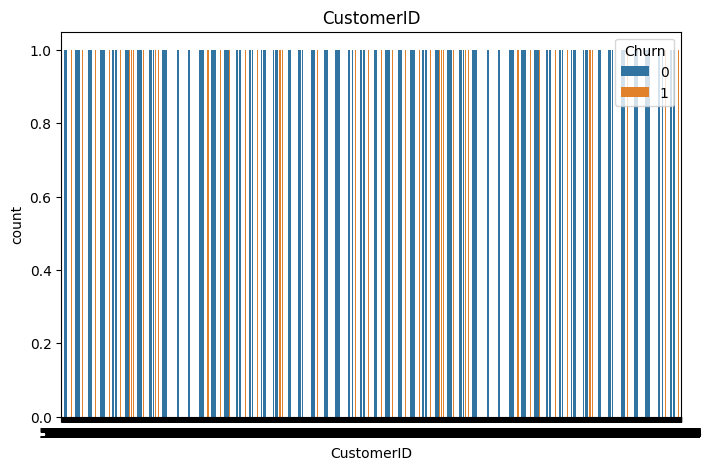

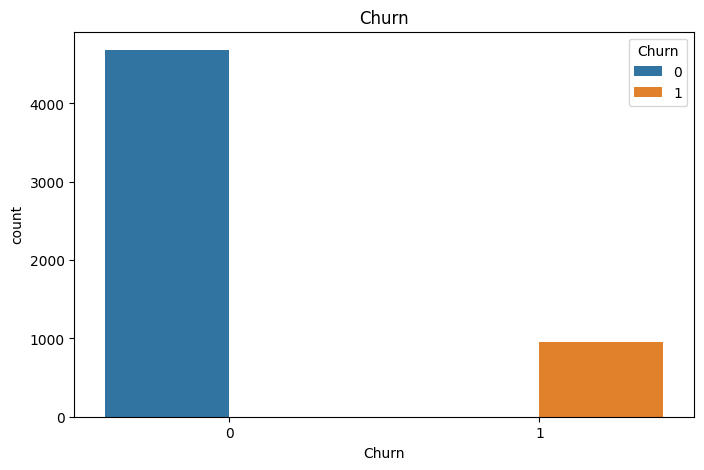

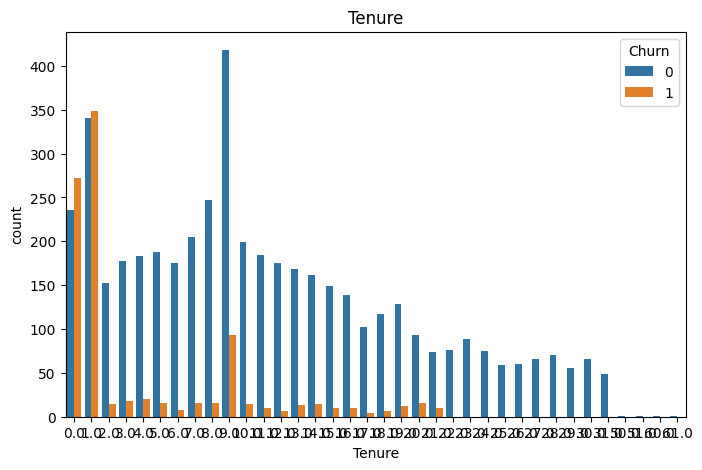

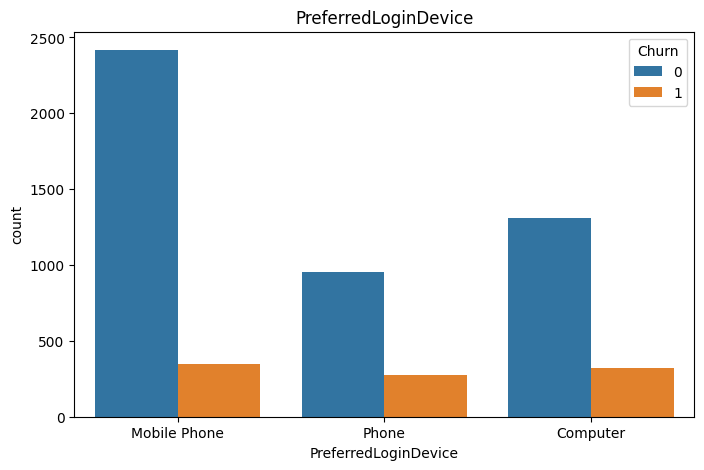

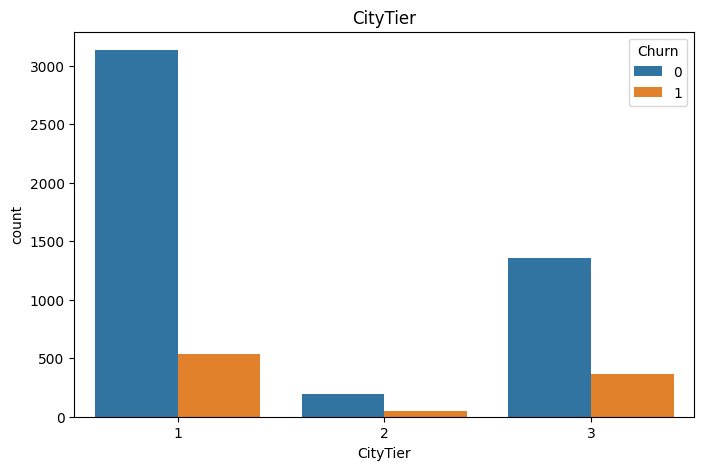

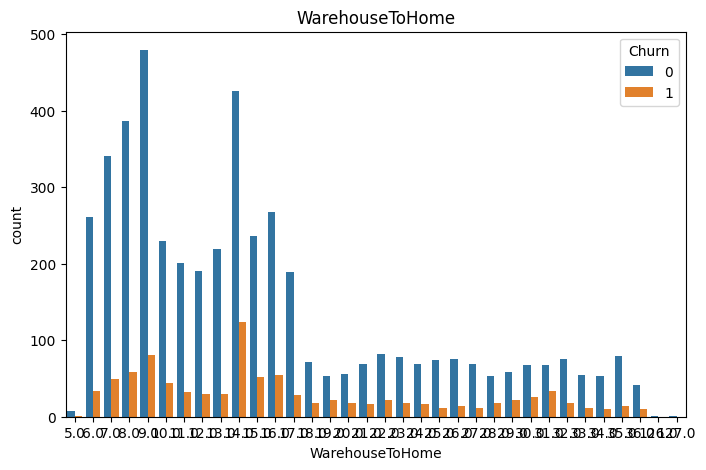

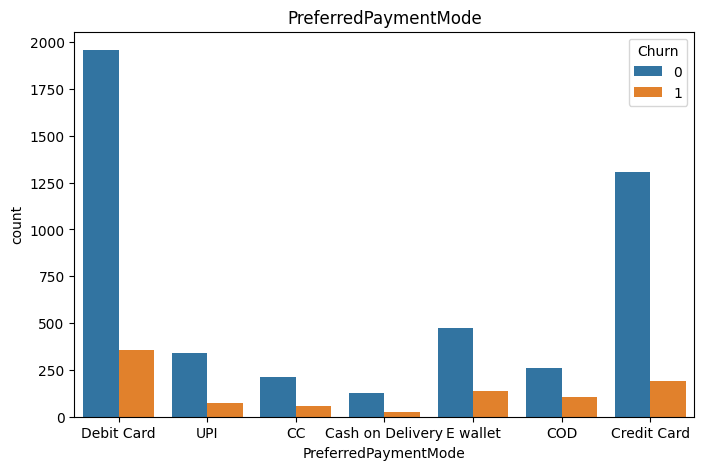

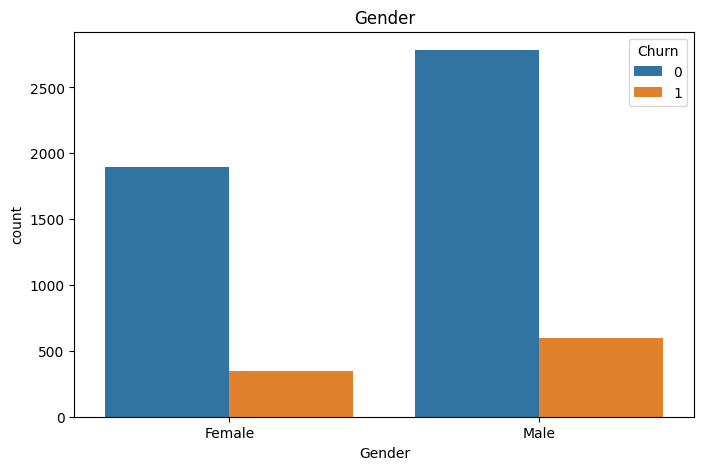

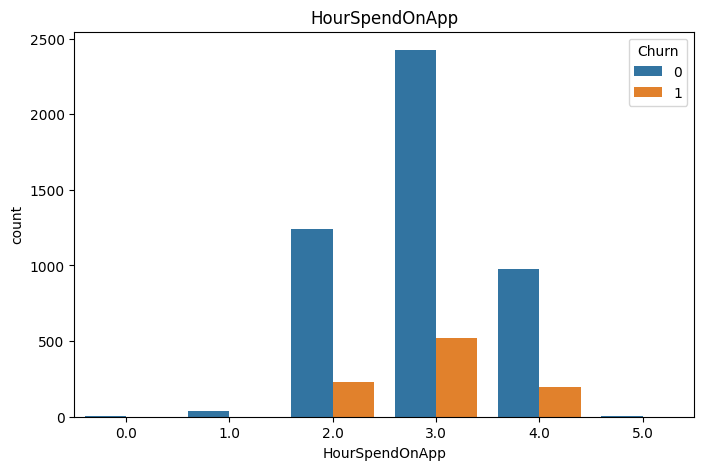

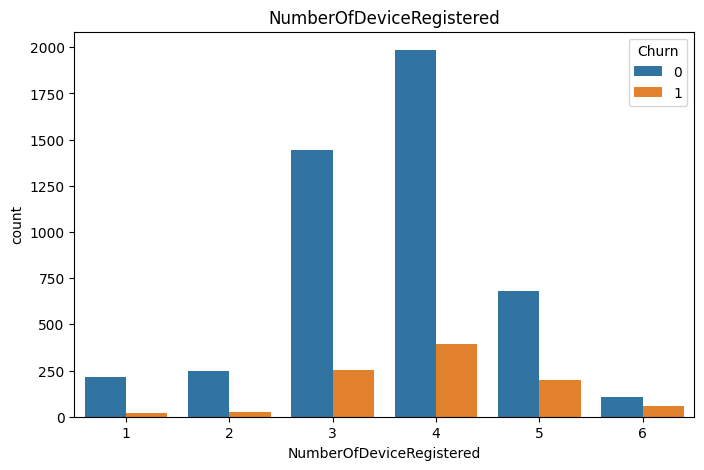

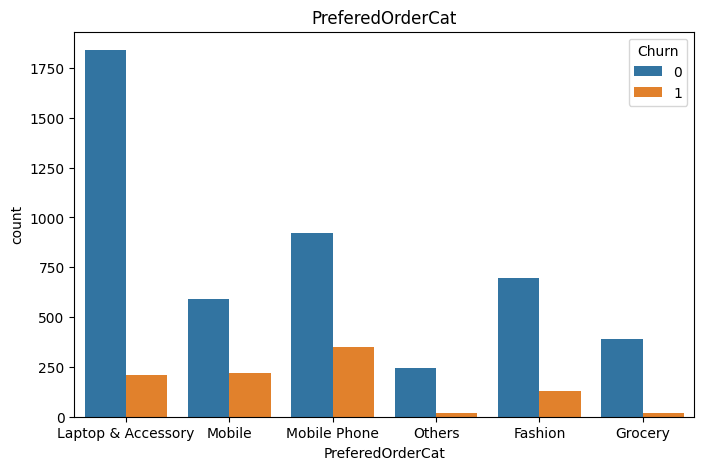

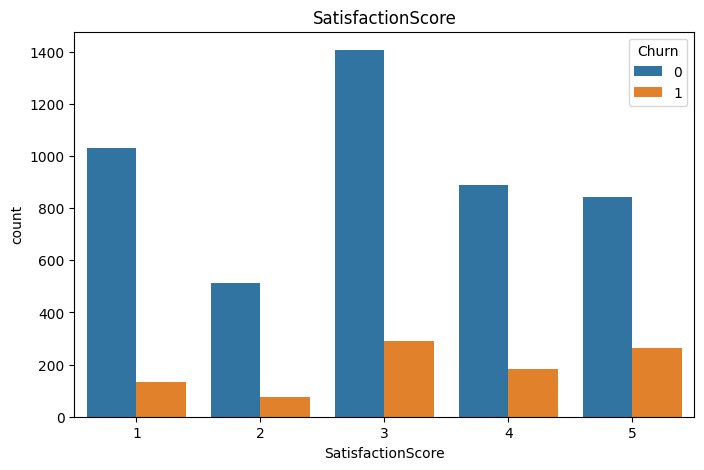

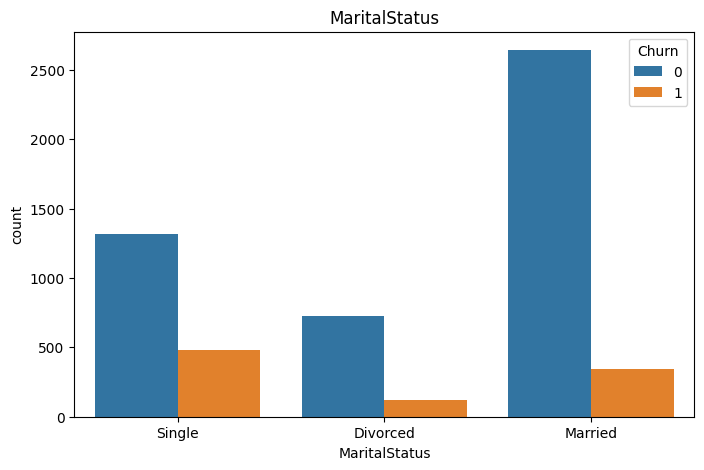

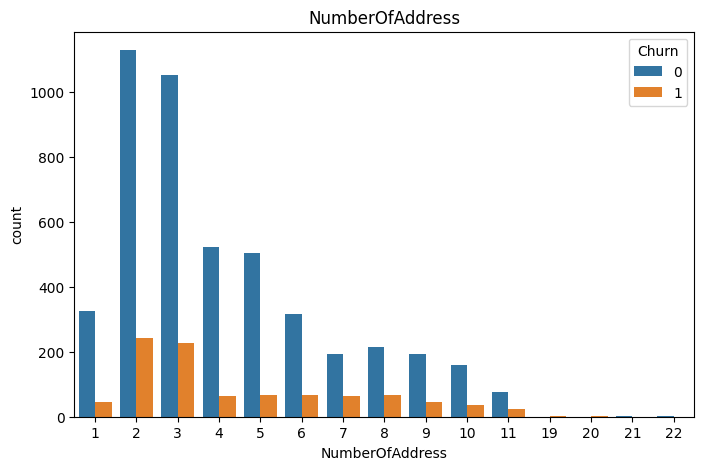

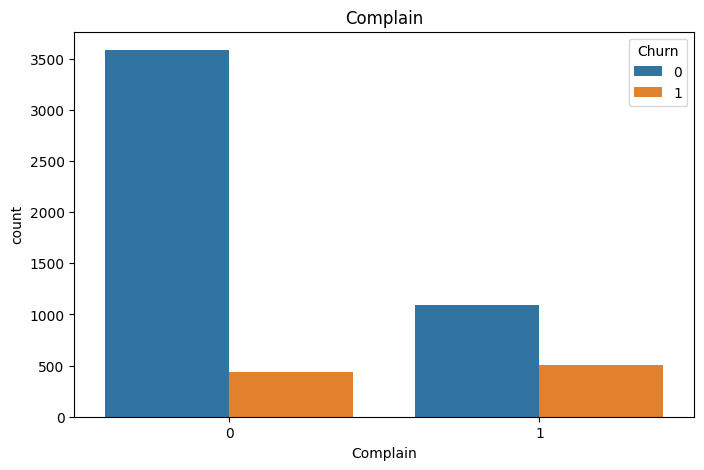

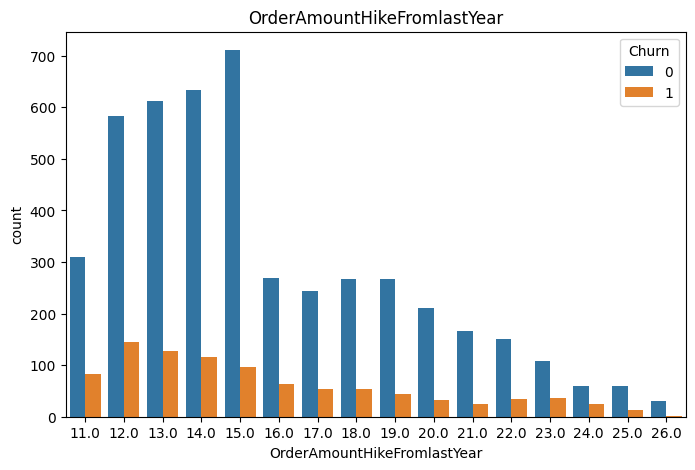

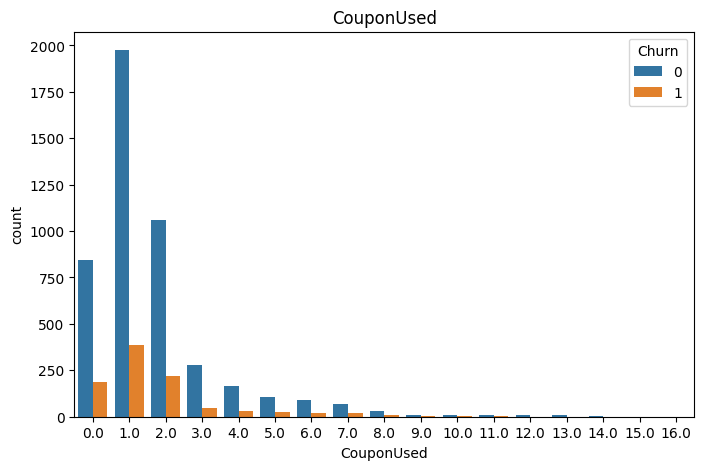

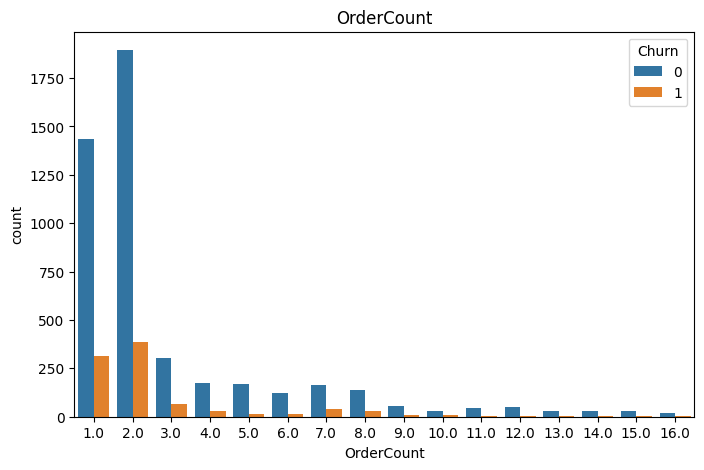

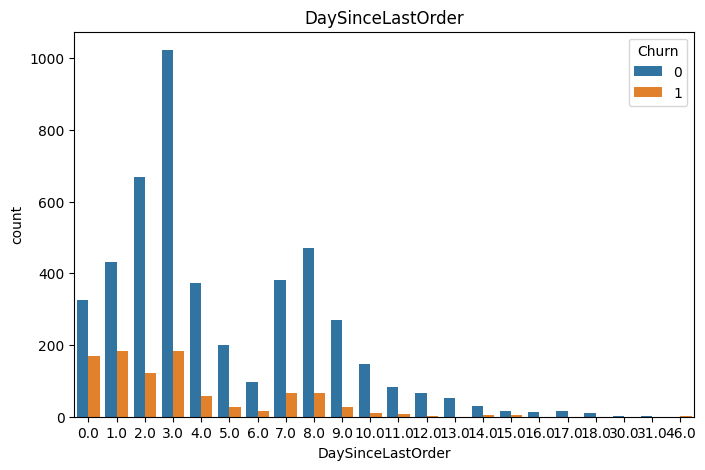

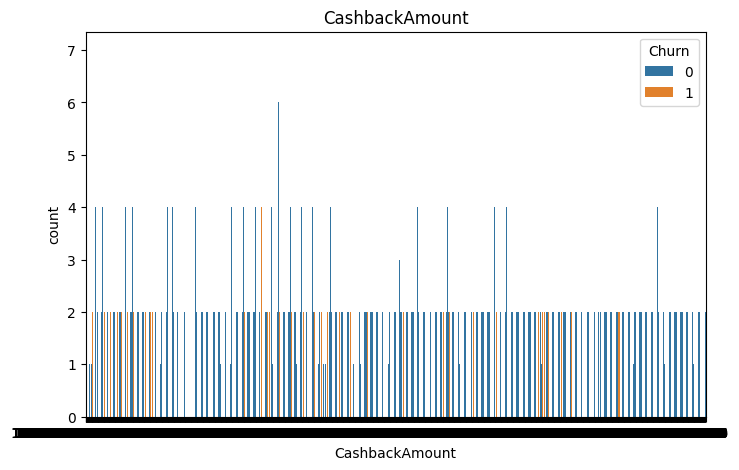

In [19]:
for col in df:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x=col, hue="Churn")
    plt.title(col)
    plt.show()

#### - There are 4682 users (83.2%) retained, while 948 users (16.8%) has churned. 
#### - Male customer tends to churn than female, but also likely to retained.
#### - Customers prefer to make payments with debit and credit cards.
#### - Customers order category for Laptop & Accessory is higher than other categories.
#### - there is no correlation between warehouse to home distance with customer churn. 
#### - City Tier 2, has low number customer.
#### - Customers spend 2-4 hours on this E-commerce app
#### - From scale 1-5 the average satisfaction score is 3.06. Customers satisfaction are neutral.
#### - Customers who churn more likely complain in their last month.

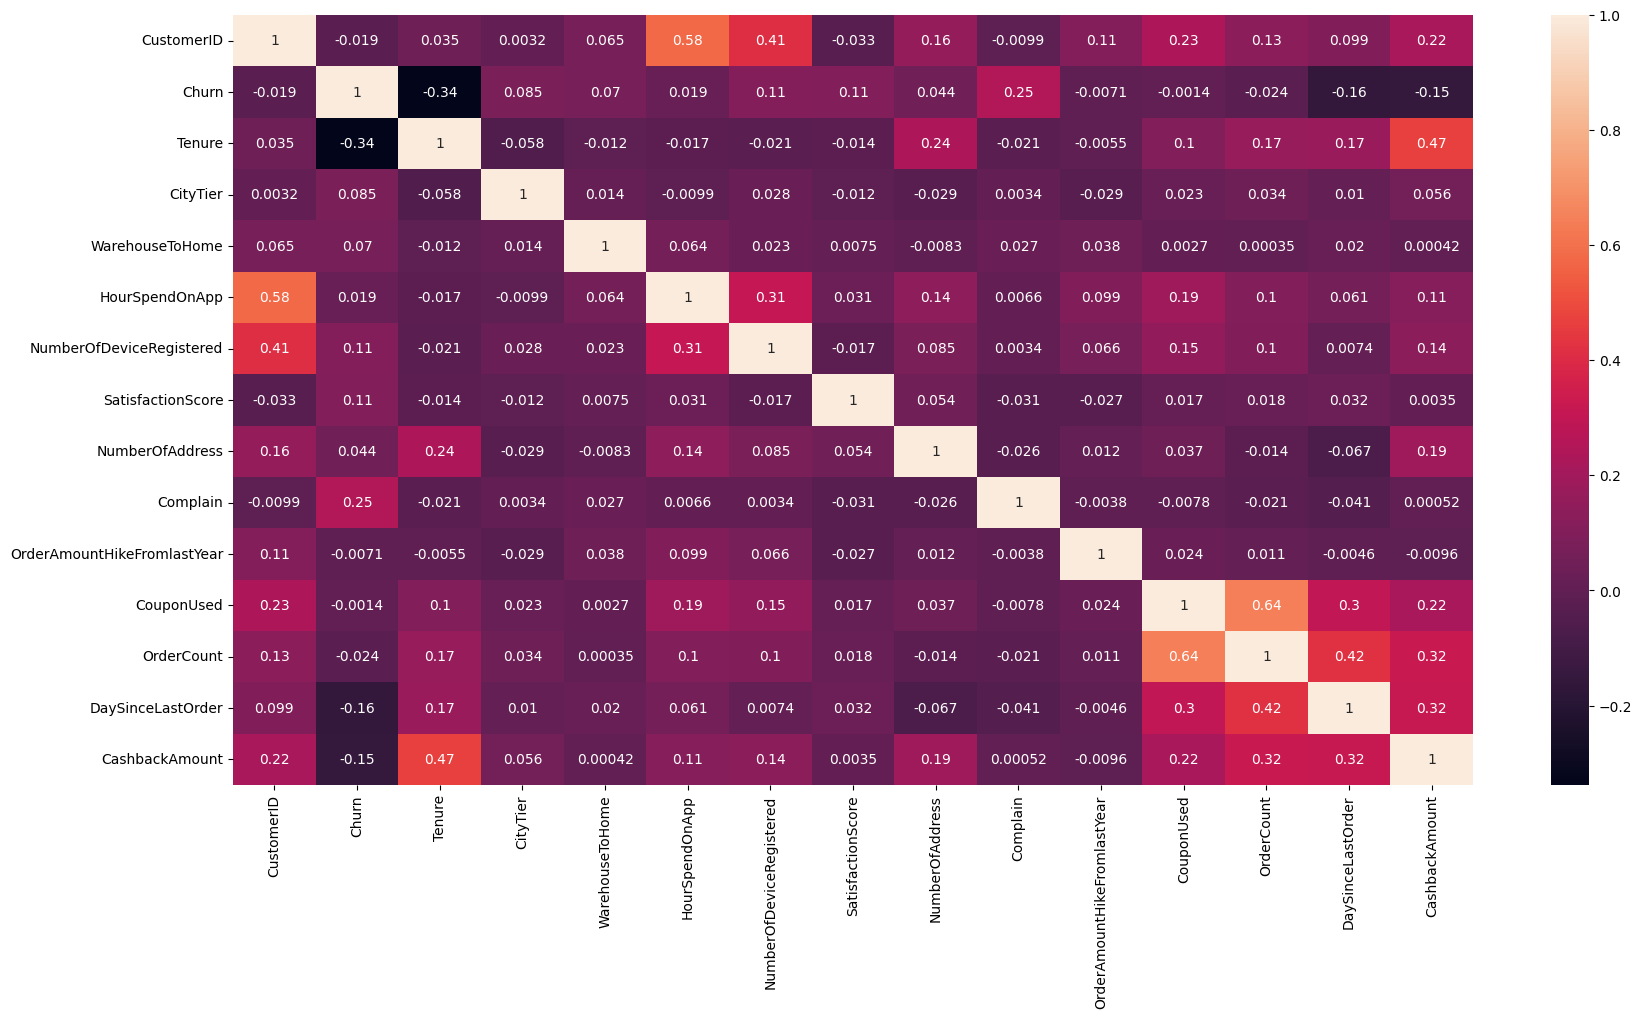

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

In [21]:
def object_to_int(x):
    if x.dtype == 'object':
        x = LabelEncoder().fit_transform(x)
    return x

df = df.apply(lambda x : object_to_int(x))

# 4- Model

### - Logistic Regression
### - KNeighborsClassifieror 
### - (SVC)
### - XGBClassifier

In [22]:
X = df.drop(['Churn'],axis=1)
y = df['Churn']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)

(3941, 19)
(1689, 19)


In [24]:
model1=LogisticRegression()
model2=KNeighborsClassifier()
model3=SVC()
model4=XGBClassifier()

### - Logistic Regression

In [25]:
    model1.fit(X_train,y_train)
    pred=model1.predict(X_test)
    score=model1.score(X_test,y_test)
    print(f"The Score Model is :{score}")
    print(classification_report(y_test,pred))

The Score Model is :0.8513913558318532
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1414
           1       0.66      0.18      0.28       275

    accuracy                           0.85      1689
   macro avg       0.76      0.58      0.60      1689
weighted avg       0.83      0.85      0.81      1689





### - KNeighborsClassifieror 


In [26]:
model2.fit(X_train,y_train)
pred=model2.predict(X_test)
score=model2.score(X_test,y_test)
print(f"The Score Model is :{score}")
print(classification_report(y_test,pred))

The Score Model is :0.8164594434576673
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1414
           1       0.29      0.09      0.13       275

    accuracy                           0.82      1689
   macro avg       0.57      0.52      0.52      1689
weighted avg       0.75      0.82      0.77      1689



 
### - (SVC)


In [27]:
model3.fit(X_train,y_train)
pred=model3.predict(X_test)
score=model3.score(X_test,y_test)
print(f"The Score Model is :{score}")
print(classification_report(y_test,pred))

The Score Model is :0.837181764357608
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1414
           1       0.00      0.00      0.00       275

    accuracy                           0.84      1689
   macro avg       0.42      0.50      0.46      1689
weighted avg       0.70      0.84      0.76      1689




### - XGBClassifier

In [28]:
model4.fit(X_train,y_train)
pred=model4.predict(X_test)
score=model4.score(X_test,y_test)
print(f"The Score Model is :{score}")
print(classification_report(y_test,pred))

The Score Model is :0.9621077560686797
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1414
           1       0.92      0.84      0.88       275

    accuracy                           0.96      1689
   macro avg       0.94      0.91      0.93      1689
weighted avg       0.96      0.96      0.96      1689

